## Example 1

/Users/boyaozhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in sqrt


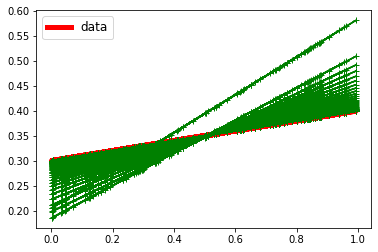

In [59]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
seed=12
tf.set_random_seed(seed)
import numpy as np
import matplotlib.pyplot as plt


x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

Weights = tf.Variable(tf.random_normal([1])) 
biases = tf.Variable(tf.zeros([1]))
y = x_data * Weights + biases 
loss = tf.reduce_mean(tf.square(y-y_data))

optimizer = tf.train.GradientDescentOptimizer(0.5) 
train = optimizer.minimize(loss)

init = tf.global_variables_initializer() 
sess = tf.Session()

sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y_data,'-r',lw=5,label='data')

rmse = []

for step in range(201):
    sess.run(train)
    if step%2 == 0:
        #print(step,sess.run(Weights),sess.run(biases))
        y_pred = x_data*sess.run(Weights)+sess.run(biases)
        rmse.append(np.sqrt(np.mean(y_pred-y_data)))
        ax.plot(x_data, y_pred, '+-g')
        ax.set_label('x')
        ax.set_label('y')
        plt.legend(loc='best',fontsize='12')
plt.show()


## Example 2

In [48]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],[2]])

product = tf.matmul(matrix1,matrix2)

sess = tf.Session()
result = sess.run(product)
print (result)


print (sess.run(matrix1))
print (sess.run(matrix2))



[[12]]
[[3 3]]
[[2]
 [2]]


## Example 3

In [49]:
# define and initialize a variable 
state = tf.Variable(0,name='content')

# define a constant
one = tf.constant(1)

# define addtion
new_value = tf.add(state, one)

# update 'state' to 'new_value'
update = tf.assign(state, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for step in range(3):
        sess.run(update)
        print (sess.run(state))

1
2
3


## Example 4

In [57]:
#input1 = tf.placeholder(tf.float32,[1,1])
#input2 = tf.placeholder(tf.float32,[1,1])

input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print (sess.run(output, feed_dict={input1:[7.],input2:[2.]}))

[14.]


## Example 5

In [61]:
# Wrapper
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size,out_size]))
    biases  = tf.Variable(tf.zeros([1, out_size])+0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

# Set up Data
x_data = np.linspace(-1,1,300,dtype=np.float32)[:,np.newaxis]
noise  = np.random.normal(0,0.05,x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

# define placeholder
xs = tf.placeholder(tf.float32, [None,1])
ys = tf.placeholder(tf.float32, [None,1])

# Set up NN
l1 = add_layer(xs,1,10,activation_function=tf.nn.relu)

prediction = add_layer(l1,10,1,activation_function=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),reduction_indices=[1]))

train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50 == 0:
        print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))

0.19222194
0.01037631
0.0062687304
0.0047753626
0.00433805
0.004081573
0.0038613176
0.0037294705
0.0036411225
0.003587658
0.0035396668
0.0034971277
0.0034610473
0.0034274617
0.0033983947
0.0033658412
0.0033318193
0.0032933294
0.0032617769
0.0032403755
